In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file (make sure it's in the same directory as your notebook)
df = pd.read_csv("grid_search_results_reviews_all.csv")

# Show the first few rows
df.head()


Matplotlib is building the font cache; this may take a moment.


,model,hidden_layers,learning_rate,activation,accuracy
0,MyNN,"(16,)",0.001,relu,0.226667
1,MyNN,"(16,)",0.001,tanh,0.315556
2,MyNN,"(16,)",0.010,relu,0.008889
3,MyNN,"(16,)",0.010,tanh,0.275556
4,MyNN,"(32,)",0.001,relu,0.262222


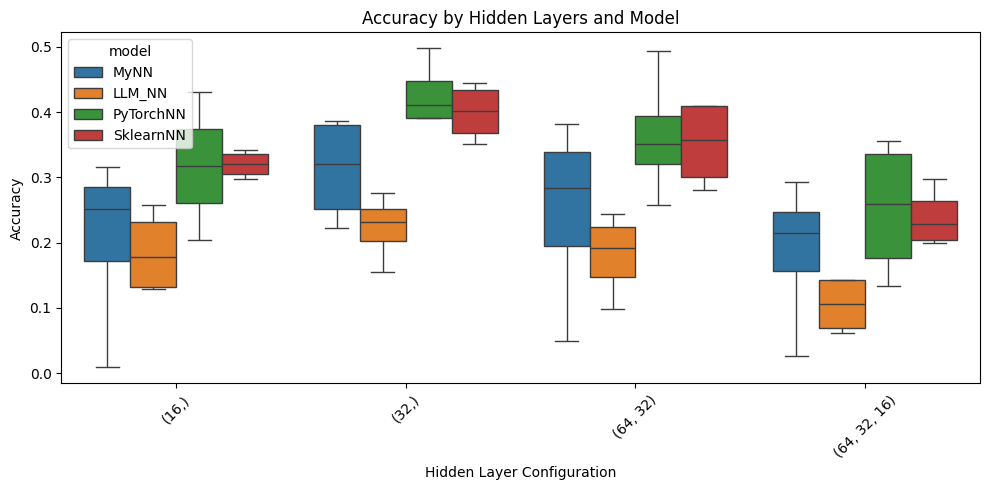

In [4]:
df['hidden_str'] = df['hidden_layers'].astype(str)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='hidden_str', y='accuracy', hue='model')
plt.title("Accuracy by Hidden Layers and Model")
plt.xlabel("Hidden Layer Configuration")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='total_nodes', ylabel='accuracy'>

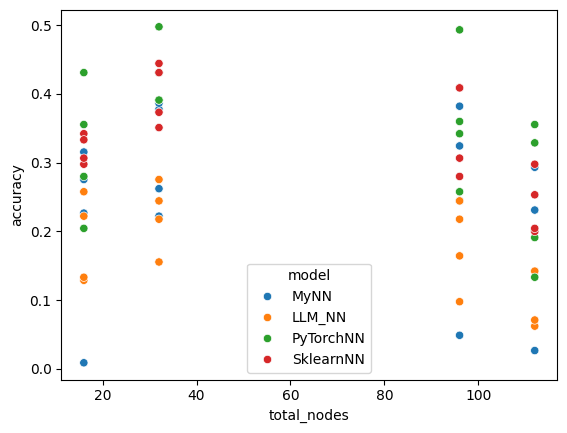

In [5]:
df['total_nodes'] = df['hidden_layers'].apply(lambda x: sum(eval(x)))
sns.scatterplot(data=df, x='total_nodes', y='accuracy', hue='model')


<Axes: xlabel='num_layers', ylabel='accuracy'>

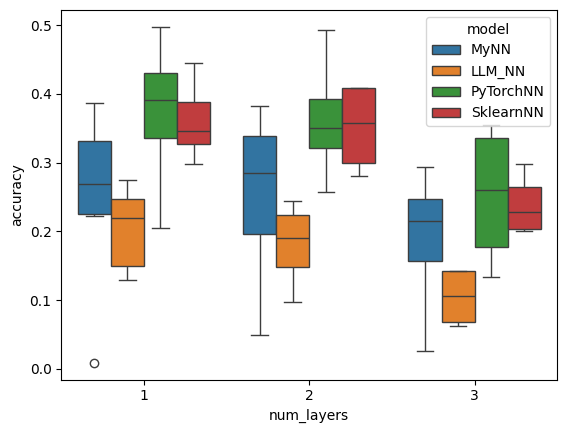

In [6]:
df['num_layers'] = df['hidden_layers'].apply(lambda x: len(eval(x)))
sns.boxplot(data=df, x='num_layers', y='accuracy', hue='model')


<Axes: xlabel='hidden_layers', ylabel='activation'>

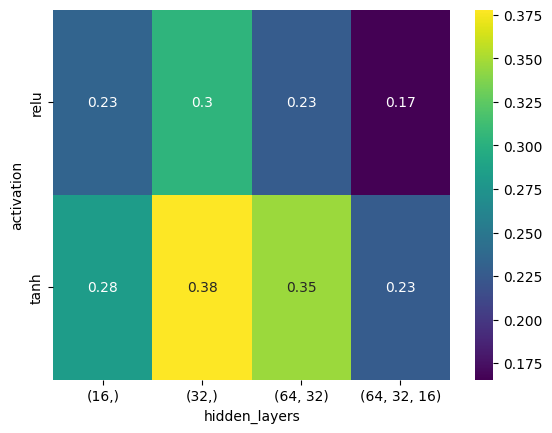

In [7]:
pivot = df.pivot_table(index='activation', columns='hidden_layers', values='accuracy', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='viridis')


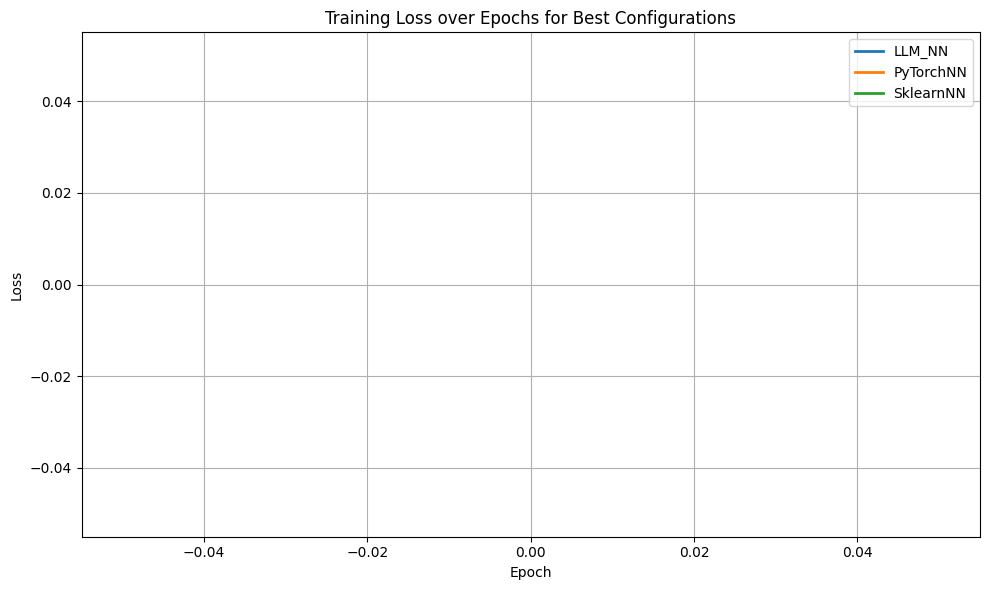

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load losses from CSVs
losses_mynn = pd.read_csv("losses_mynn.csv")['loss']
losses_llm = pd.read_csv("losses_llm.csv")['loss']
losses_pytorch = pd.read_csv("losses_pytorch.csv")['loss']
losses_sklearn = pd.read_csv("losses_sklearn.csv")['loss']

# Plot all on one figure
plt.figure(figsize=(10, 6))
# plt.plot(losses_mynn, label="MyNN", linewidth=2)
plt.plot(losses_llm, label="LLM_NN", linewidth=2)
plt.plot(losses_pytorch, label="PyTorchNN", linewidth=2)
plt.plot(losses_sklearn, label="SklearnNN", linewidth=2)

plt.title("Training Loss over Epochs for Best Configurations")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("convergence_all_models.png")  # Optional
plt.show()
